# Iteration and Simulation

In the case we want to repeat an experiment or a process multiple times, a <i> for </i> statement can be used. Before we continue with the example from the previous section, we focus on the foundation of this iteration tool.

A <i> for </i> statement can iterate through a sequence and perform some action on each element. This sequence can be a list, a string, or a range of numbers to name a few. To iterate through a sequence we use a choice of iterator that loops through each item in the sequence. The general format of a <i> for </i> statement is below. Notice we specify some iterator that loops through each element <i> in </i> some sequence. The body of the <i> for </i> statement is excuted each pass through the sequence.
```python
for iterator in sequence:
    action    
```

In [1]:
import numpy as np
import pandas as pd

For example, to print out each element in a given list we use the following code.

In [8]:
adj = ["red","rotten","tasty"]

In [9]:
for y in adj:
    print(y)

red
rotten
tasty


This says for every single element <i> y </i> in the list <i>adj</i>, we execute the indented body: <i>print(y)</i>. The y serves as a placeholder or iterator that represents each element in the list. We can alternately use something else since the choice of iterator does not matter. The <i> for </i> statement below also prints out each element in the list <i>adj</i>.

In [10]:
for item in adj:
    print(item)

red
rotten
tasty


Note what we iterate over does not need to be directly related to the body of the <i>for</i> statement. In fact <i>for</i> statements are very useful in telling us to execute the body or action a given number of times.

Below is an example where the iterator is in the body of the <i>for</i> statement and an alternate example where we use <i> for </i> statements to repeat or loop through the body statement. 

In [11]:
for i in range(3):
    print(i)

0
1
2


In [12]:
for i in range(3):
    print('potato')
    

potato
potato
potato


# Nested For Loops

Suppose we want to repeat a process for each element in a sequence. We can accomplish this by nesting a <i> for </i> statement within a <i> for </i> statement. 
For example, suppose our sequences are lists and we want to pair every element in list_1 with each element in list_2. We could write out all the possible combinations of list_1, list_2 pairs by hand or we could use a nested <i> for </i> statement to systematically take each element in list_1 and cycle through all elements in list_2. This takes the following form
```python
for item_1 in list_1:
    for item_2 in list_2:
        print(item_1, item_2)
```

For a more concrete example, consider the list <i> adj </i> above and a new list <i> fruits </i>. We use a nested <i> for </i> statement to print all possible adj, fruit combinations. 

In [13]:
fruits = ["apple","banana","cherry"]

In [14]:
for a in adj:
    for f in fruits:
        print(a,f)

red apple
red banana
red cherry
rotten apple
rotten banana
rotten cherry
tasty apple
tasty banana
tasty cherry


We could pick random combinations, but in doing so we do not guarantee that generating more than one will be distinct. Setting <code> combos =5 </code> below, the <i> for </i> statement then outputs a random adjective coupled with a random fruit for each number in the range combos. Feel free to experiment with the number of combinations to print below.

In [15]:
combos = 5 
for i in np.arange(int(combos)):
    print(np.random.choice(adj) + ' ' + np.random.choice(fruits))

rotten apple
tasty banana
tasty cherry
red cherry
tasty banana


# Simulating six sided die experiment: How many evens?

In the last section we experimented with finding the number of even rolls when rolling a six sided die 100 times. Now we can simulate repeating this experiment many times using the process of iteration.<br>
We redefine the six sided die below and relevant definitions used in the last section.

In [11]:
die = np.arange(1, 7)


def parity(input_integer): 
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"
    
vec_parity = np.vectorize(parity) 

We set the desired number of iterations for this experiment and create a <i>for</i> loop that executes the experiment of rolling a die 100 times, checking whether the rolls are even, and then appending the number of evens to an array. <br>

After the experiments are simulated, we use the results array to calculate experiment information. Finding the minimum and maximum number of evens rolled out of the total 100 rolls as well as the average of evens gives us useful and interesting information. 

Experiment below with different values for num_experiments, but be careful as it is easy to set up a long run time!

In [12]:
num_experiments = 100000
total_evens = np.empty(0)

for i in np.arange(num_experiments): #Alternatively we could use range(num_experiments)
    total_evens = np.append(total_evens, sum(vec_parity(np.random.choice(die,100)) == 'even'))
    

# Since these aren't indented, they are outside of the "for" loop
print('    Number of experiments:', len(total_evens))
print('    Min Evens (out of 100):', min(total_evens))
print('    Max Evens (out of 100):', max(total_evens))
print('    Mean Evens (out of 100):', round(np.mean(total_evens)))

    Number of experiments: 100000
    Min Evens (out of 100): 29.0
    Max Evens (out of 100): 72.0
    Mean Evens (out of 100): 50


If you want to see the contents of the result array you can run the following line.

In [17]:
total_evens

array([51., 45., 50., ..., 55., 57., 54.])

We can visualize these results using a histogram.

array([[<AxesSubplot:title={'center':'Even numbers in 100000 tosses'}>]],
      dtype=object)

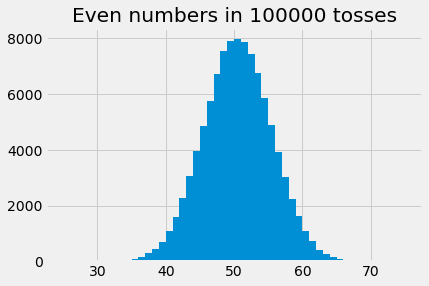

In [42]:
legend = 'Even numbers in ' + str(num_experiments) + ' tosses'
pd.DataFrame(
    {legend: total_evens
    }).hist(bins = np.arange(25, 76))

For a large enough num_experiments input, we find that the distribution of evens is symmetric with an average of 50 out of 100 even rolls of the die! We can also see that a majority of the data is contained in the range 40-60, thus rolling a six sided die 100 times, the most common outcomes occur in that range.